# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

In [1]:
! git clone https://github.com/ds4e/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 38 (delta 3), reused 2 (delta 2), pack-reused 30 (from 1)
Receiving objects: 100% (38/38), 7.17 MiB | 7.76 MiB/s, done.
Resolving deltas: 100% (6/6), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [2]:
# 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv')

In [5]:
# 2
print("Dimensions", df.shape)
print("# observations = ", df.shape[0])
print("Variables:", df.columns)

df.head()

Dimensions (3798, 63)
# observations =  3798
Variables: Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enrol

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [7]:
# 3
pd.crosstab(df['control'], df['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


**Describe the patterns you see.**
Private for-profit institutions have a relatively even distribution between being 2 and 4-year institutions, whereas the majority of private not-for-profit institutions are 4-year institutions. The majority of public institutions are 2-year institutions, although there is still a decent number of public 4-year institutions.

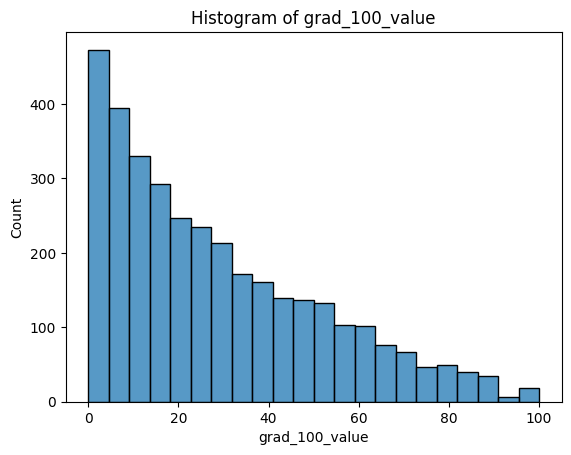

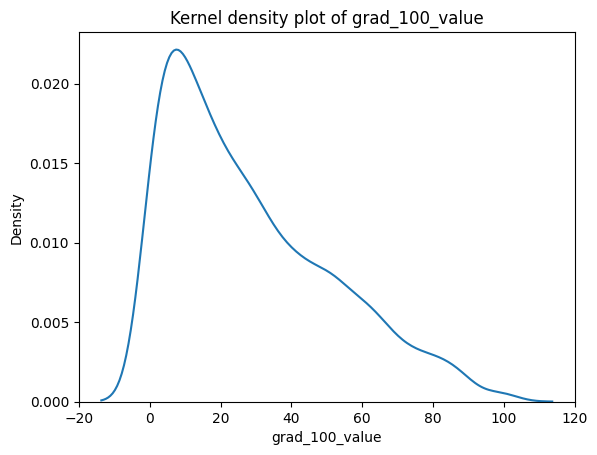

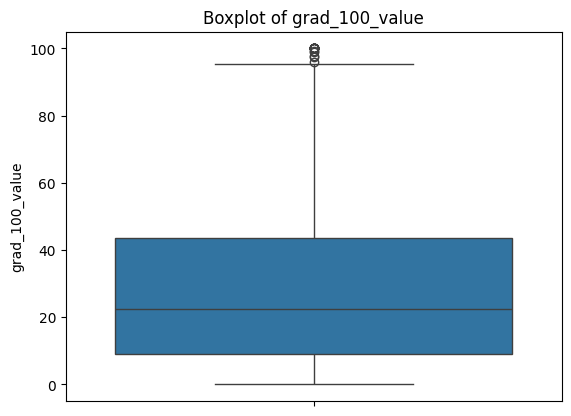



Statistical description of grad_100_value


,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


In [11]:
# 4
# For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.
sns.histplot(df['grad_100_value'])
plt.title("Histogram of grad_100_value")
plt.show()

sns.kdeplot(df['grad_100_value'])
plt.title("Kernel density plot of grad_100_value")
plt.show()

sns.boxplot(df['grad_100_value'])
plt.title("Boxplot of grad_100_value")
plt.show()

print("\n")
print("Statistical description of grad_100_value")
df['grad_100_value'].describe()

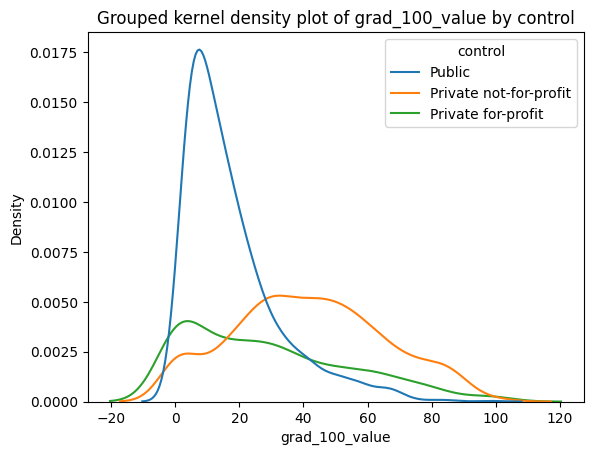

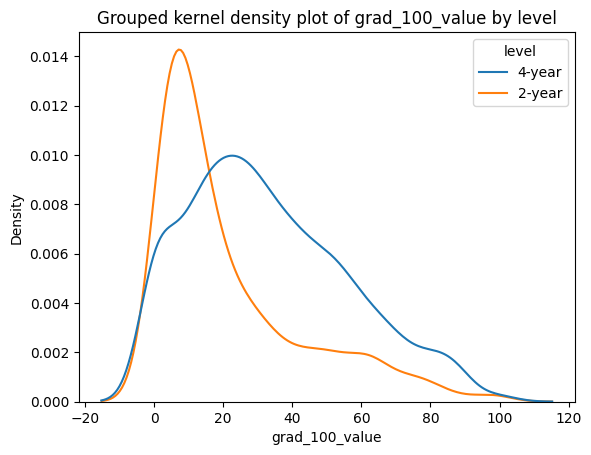

In [16]:
# 5
# For grad_100_value, create a grouped kernel density plot by control
sns.kdeplot(data=df, x='grad_100_value', hue='control')
plt.title("Grouped kernel density plot of grad_100_value by control")
plt.show()

# For grad_100_value, create a grouped kernel density plot by level
sns.kdeplot(data=df, x='grad_100_value', hue='level')
plt.title("Grouped kernel density plot of grad_100_value by level")
plt.show()

**Describe what you see.**
Based on the peaks in the kernel density plots, private not-for-profit universities appear to have the highest graduation rates out of the three types of institutions. Graduation rates seem to be higher among 4-year institutions compared to 2-year institutions.

In [26]:
# Grouped calculations of statistical descriptions of grad_100_value by level and control
df.loc[:,['grad_100_value','level', 'control']].groupby(['level', 'control']).describe()

grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

**Which institutions appear to have the best graduation rates?**
Private not-for-profit institutions appear to have the best graduation rates, with 2-year private not-for-profit institutions having slightly higher graduation rates than their 4-year counterparts.

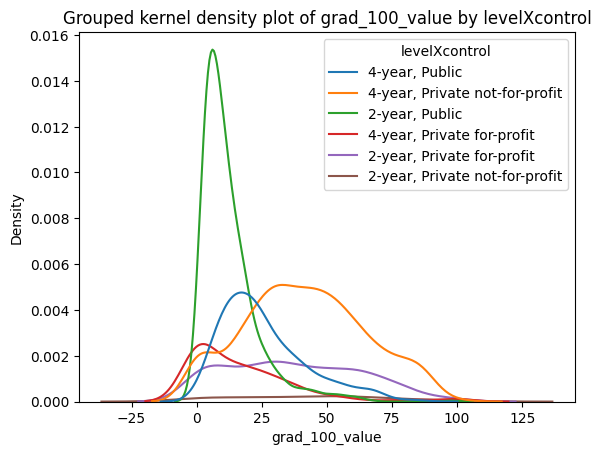

In [21]:
# 6
# Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control.
df['levelXcontrol'] = df['level']+', '+df['control']

# Make a grouped kernel density plot.
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol')
plt.title("Grouped kernel density plot of grad_100_value by levelXcontrol")
plt.show()

**Which institutions appear to have the best graduation rates?**
Based on the "peaks" of the kernel density plots, the institutions with the best graduation rates appear to be 4-year, private not-for-profit institutions.

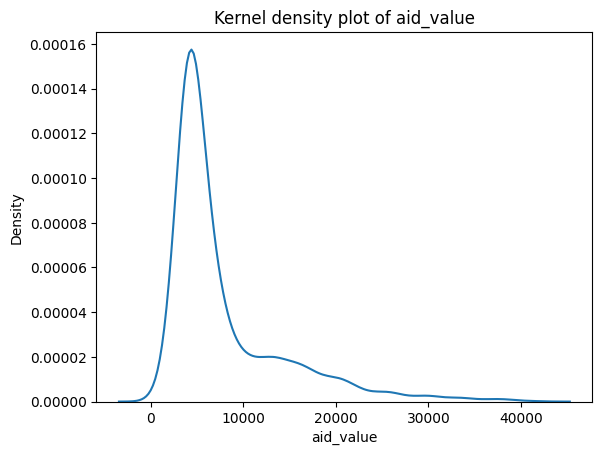

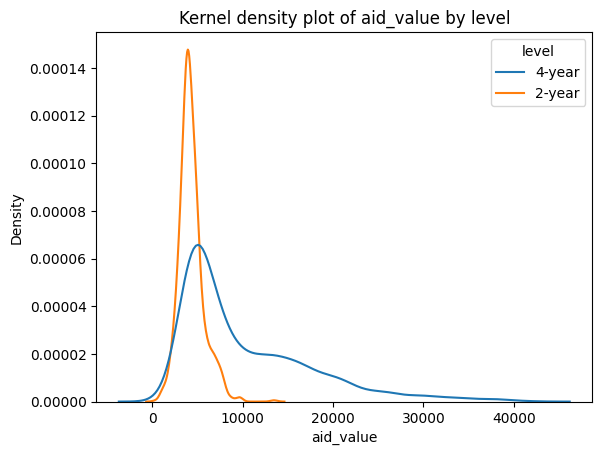

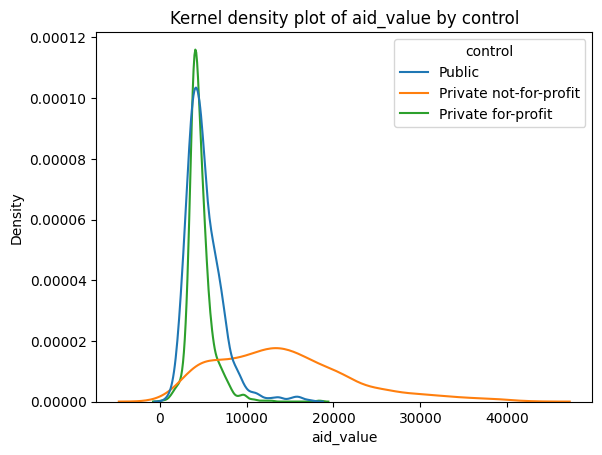

In [24]:
# 7
# Make a kernel density plot of aid_value.
sns.kdeplot(df['aid_value'])
plt.title("Kernel density plot of aid_value")
plt.show()

# Now group your graph by level and control.
sns.kdeplot(data=df, x='aid_value', hue='level')
plt.title("Kernel density plot of aid_value by level")
plt.show()

sns.kdeplot(data=df, x='aid_value', hue="control")
plt.title("Kernel density plot of aid_value by control")
plt.show()

# Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.

**What explains the shape of the graph? **
In the kernel density plot of aid_value, there appears to be a few observations with very high values comapred to the rest of the dataset (high outliers). This can be explained by the few institutions that are very generous with their student aid arrangements (which can also have to do with how much funds the institution has to begin with, that it can distribute for student aid).

Based on the grouped kernel density plots, 4-year institutions provide students with more aid than their 2-year counterparts. This makes sense, as students will probably need more aid if they are staying in university for longer.

Private-for-profit and public institutions distribute less student aid than private not-for-profit institutions. This is likely due to the profit-driven incentives of private for-profit institutions, which leads to them keeping more money and distributing less aid. Public institutions may have less funds to begin with than private institutions, which is why they can distribute less aid. Private not-for-profit institutions probably have more funding and are not profit-driven, which can explain why they are the biggest student aid donors.

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see?

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.